In [1]:
from bmtk.builder.networks import NetworkBuilder
from bmtk.utils.sim_setup import build_env_bionet
import json
from edit_genome import process_json
from bmtk.simulator import bionet
from bmtk.analyzer.spike_trains import to_dataframe
from bmtk.analyzer.cell_vars import plot_report
import os
import shutil
from neuron import h
import ipywidgets as widgets
from ipywidgets import HBox,VBox,Label,Layout
from IPython.display import display
%matplotlib inline

In [2]:
net = NetworkBuilder('BL')
net.add_nodes(cell_name='BL',
          potental='exc',
          model_type='biophysical',
          model_template='ctdb:Biophys1.hoc',
          model_processing='aibs_allactive',
          dynamics_params='BL_fit.json',
          morphology='reconstruction.swc')
shutil.rmtree('./network')
net.build()
net.save_nodes(output_dir='network')
build_env_bionet(network_dir='network', tstop=2000.0, dt=0.1,
                 report_vars=['v']
                )

shutil.copy('sources/BL_fit.json','components/biophysical_neuron_models/')
shutil.copy('sources/neuronal_model_491766131/reconstruction.swc','components/morphologies/')
shutil.rmtree('components/mechanisms/')
shutil.copytree('sources/modfiles','components/mechanisms/modfiles')
shutil.copytree('sources/x86_64','components/mechanisms/x86_64')

with open("./simulation_config.json",'r') as load_f:
        load_dict = json.load(load_f)
        #print(load_dict)
        load_dict['inputs'] =  {"current_clamp1": {
        "input_type": "current_clamp",
        "module": "IClamp",
        "node_set": "all",
        "amp": 0.3,
        "delay": 300.0,
        "duration": 1000.0
        }
        }
with open("./simulation_config.json",'w') as dump_f:
    json.dump(load_dict,dump_f)


In [3]:
filePath = '/home/mizzou/Desktop/BMTK_notebook-master/BMTK_notebook/sources/modfiles'
a = os.listdir(filePath)

w_0 = widgets.Checkbox(value=False,description=a[2],disabled=False)
w_1 = widgets.Checkbox(value=False,description=a[18],disabled=False)
w_2 = widgets.Checkbox(value=False,description=a[12],disabled=False)

def update_0(*args):
    if w_0.value:
        text0 = widgets.FloatText(
            value=7.5,
            description='NaP:',
            disabled=False
        )
        value0 = text0.value
        process_json('./components/biophysical_neuron_models/BL_fit.json','Nap',value0)
        display(text0)
def update_1(*args):
    if w_1.value:
        text1 = widgets.FloatText(
            value=7.5,
            description='Ih:',
            disabled=False
        )
        value1 = text1.value
        process_json('./components/biophysical_neuron_models/BL_fit.json','Ih',value1)
        display(text1)        
def update_2(*args):
    if w_2.value:
        text2 = widgets.FloatText(
            value=7.5,
            description='Im:',
            disabled=False
        )
        value2 = text2.value
        process_json('./components/biophysical_neuron_models/BL_fit.json','Im',value2)
        display(text2)              
        
w_0.observe(update_0,'value')
w_1.observe(update_1,'value')
w_2.observe(update_2,'value')
ui1 = HBox([VBox([Label('Channels')],layout=Layout(width='10%')),VBox([w_0,w_1,w_2],layout=Layout(width='38%'))])
ui1

In [4]:
conf = bionet.Config.from_json('simulation_config.json')
conf.build_env()
net = bionet.BioNetwork.from_config(conf)
sim = bionet.BioSimulator.from_config(conf, network=net)

pc = h.ParallelContext()
hcell = pc.gid2cell(0)

2019-10-04 17:20:42,071 [INFO] Created log file


INFO:NEURONIOUtils:Created log file


2019-10-04 17:20:42,210 [INFO] Building cells.


INFO:NEURONIOUtils:Building cells.


2019-10-04 17:20:42,714 [INFO] Building recurrent connections


INFO:NEURONIOUtils:Building recurrent connections


In [5]:
FloatText1 = widgets.FloatText(
    value=-38.43,
    description='Vhalf_m:',
    disabled=False
)
hcell.soma[0].mhalf_Nap = FloatText1.value
FloatText2 = widgets.FloatText(
    value=-52.7,
    description='Vhalf_n:',
    disabled=False
)
hcell.soma[0].vhalf_im  = FloatText2.value

FloatText4 = widgets.FloatText(
    value=7.2,
    description='K_m:',
    disabled=False
)
hcell.soma[0].slope1_Nap = FloatText4.value

FloatText5 = widgets.FloatText(
    value=10.34,
    description='K_n:',
    disabled=False
)
hcell.soma[0].k_im = FloatText5.value

ui2 = HBox([VBox([Label('Vhalf&slope')],layout=Layout(width='10%')),VBox([FloatText1,FloatText2,FloatText4,FloatText5],layout=Layout(width='38%'))])
ui2

2019-10-04 17:20:42,850 [INFO] Running simulation for 2000.000 ms with the time step 0.100 ms


INFO:NEURONIOUtils:Running simulation for 2000.000 ms with the time step 0.100 ms


2019-10-04 17:20:42,852 [INFO] Starting timestep: 0 at t_sim: 0.000 ms


INFO:NEURONIOUtils:Starting timestep: 0 at t_sim: 0.000 ms


2019-10-04 17:20:42,856 [INFO] Block save every 5000 steps


INFO:NEURONIOUtils:Block save every 5000 steps


2019-10-04 17:20:43,189 [INFO]     step:5000 t_sim:500.00 ms


INFO:NEURONIOUtils:    step:5000 t_sim:500.00 ms


2019-10-04 17:20:43,454 [INFO]     step:10000 t_sim:1000.00 ms


INFO:NEURONIOUtils:    step:10000 t_sim:1000.00 ms


2019-10-04 17:20:43,722 [INFO]     step:15000 t_sim:1500.00 ms


INFO:NEURONIOUtils:    step:15000 t_sim:1500.00 ms


2019-10-04 17:20:44,050 [INFO]     step:20000 t_sim:2000.00 ms


INFO:NEURONIOUtils:    step:20000 t_sim:2000.00 ms


2019-10-04 17:20:44,075 [INFO] Simulation completed in 1.226 seconds 


INFO:NEURONIOUtils:Simulation completed in 1.226 seconds 


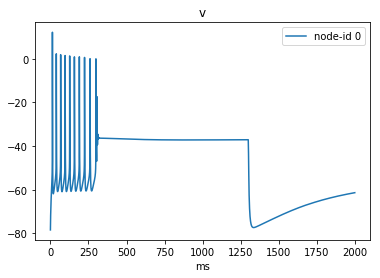

In [6]:
sim.run()
to_dataframe(config_file='simulation_config.json')
plot_report(config_file='simulation_config.json')